# Regression Demo: Polynomial Regression
The purpose of this demo is to demonstrate the ease and utility of performing polynomial regression, of which linear regression is by far the most common subtype. In this example, we will generate noisy data using a known distribution. We will then treat this data as if it was recorded from an experiment. We will try various methods of fitting the data, and plotting those fits on an appropriate scatter plot for comparison. Then, using each model, we will try to predict on a separate set of test data, and observe the quality of fit using a number of metrics. 

## Demo Instructions:

Perform the following steps:

1. Create a function that generates a number according to the following equation: 
    * y = sin(x) + 0.1 * normal(0,1) 
2. Generate two samples with x randomly chosen between 0 and 3. 
    * A training set of 10 (x,y) pairs 
    * A test set of 100 (x,y) pairs 
3. Fit the following polynomials to the training set:
    * Degree 1 polynomial (a line) 
    * Degree 2 polynomial (a quadratic) 
    * Degree 9 polynomial 
4. Create a plot showing the original data as a scatter plot and the three polynomial fits with a legend indicating the degree of the polynomial. Also, overlay the sin(x) function with a dotted line. 
5. Apply each of the 3 models to predict the y-value from the x-value in the test set. Find the root mean square error between the predictions and the true values. 

# Solutions: 

The following link explains numpy's [polyfit() function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), which can be used to fit a polynomial of a various degree to a set of points. This function is used numerous times in the tutorial. 
## 1. Create a function that generates a number according to the follow equation. 
### 1.A. y = sin(x) + 0.1 * normal(0,1)

In [1]:
from numpy import *
import numpy as np
import math
from matplotlib.pyplot import *

#Create a function that generates y-values
#Equation is y = sin(x) + 0.1*normal(0,1)
#x is for the x-variables that will be used to calculate y
#and numValues allows you to specify how many variables for the data set
def y_generator(x,numValues):
    return math.sin(x)+0.1*np.random.normal(0,1,numValues)

print(y_generator(1,10))

[0.70911762 0.73465716 0.78885099 0.83105678 0.6944052  0.89775547
 0.87269193 0.75204269 0.86635859 0.8082062 ]


## 2. Generate two samples with x randomly chosen between 0 and 3:
### 2.A. A training set of 10 (x,y) pairs

----X values for training set----
[2.43889426825542, 1.3038885322465683, 2.222207042206777, 0.7794989890252475, 1.8060349648636778, 2.2600556030394774, 2.5463441644878695, 0.39589263912638406, 0.7255936406661595, 1.3609325782844817]

----Y values for training set----
[array([0.52796985]), array([1.1020424]), array([0.88327718]), array([0.81629535]), array([1.09066894]), array([0.76176719]), array([0.49992889]), array([0.28395139]), array([0.75575503]), array([1.07049855])]


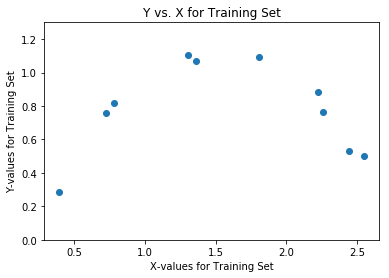

In [2]:
#Generate a training set of 10 (x,y) pairs

#Creates a list of 10 x-values from 0-3
x_values_training = []
for i in range(10):
    x_values_training.append(random.uniform(0,3))
print("----X values for training set----")
print(x_values_training)

#Creates a list of 10 y-values based on the determined
y_values_training = []
for x in x_values_training:
    y_values_training.append(y_generator(x,1))
print()
print("----Y values for training set----")
print(y_values_training)


#Creates an array for the x-values and an array for the y-values #in the training set
xtraining_array = np.array(x_values_training)
ytraining_array = np.array(y_values_training)

%matplotlib inline
#Plots the data points in the training set
ylim(0,1.3)
plot(xtraining_array,ytraining_array,'o')
xlabel('X-values for Training Set')
ylabel('Y-values for Training Set')
title('Y vs. X for Training Set')
show()

### 2.B. A test set of 100 (x,y) pairs

----X values for test set----
[2.97962841424226, 1.6343033353372487, 0.014672024693334174, 2.776133042727199, 2.6143140008191654, 1.8906909378519337, 1.3396902936275454, 1.6504676285621578, 1.3156616707967106, 0.8164903837207524, 2.6744273929207885, 1.9800813343520973, 1.4809801143107355, 0.9399743004112813, 0.7049752715506364, 1.9181590955569132, 2.1267342116169226, 1.5108876533404727, 1.2224514208953823, 0.48360696951530424, 0.8508285824135985, 2.9373950033166247, 2.91348525986547, 0.5497733859530262, 0.9784661664290566, 0.5054946009127, 1.0478032544124112, 2.02944640673554, 0.8712656177412925, 0.14072508427107544, 0.8907498278171502, 1.258160263762635, 2.1722792998290927, 0.7867140861399301, 2.209806967667668, 0.8671079333091107, 2.7180486173268967, 0.7695774814790403, 0.7474057966257553, 1.7026794802884337, 1.3781326606719229, 1.3017882727017551, 2.6727423382669246, 0.3150319641560466, 2.330131002687913, 2.194577198536633, 0.9999554875095086, 0.8672184632465114, 1.134735443605266, 

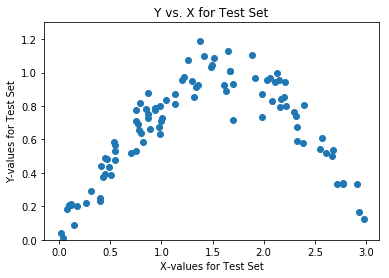

In [3]:
#Generate a test set of 100 (x,y) pairs
#Creates a list of 100 random x-values from 0-3
x_values_test = []
for i in range(100):
    x_values_test.append(random.uniform(0,3))
print("----X values for test set----")
print(x_values_test)
    
#Creates a list of 100 y-values based on the previously #designed x-values
y_values_test = []
for x in x_values_test:
    y_values_test.append(y_generator(x,1))
print()
print("----Y values for test set----")
print(y_values_test)

#Creates an array for the test set
xtest_array = np.array(x_values_test)
ytest_array = np.array(y_values_test)

%matplotlib inline
#Plots the data points in the test set
ylim(0,1.3)
plot(xtest_array,ytest_array,'o')
xlabel('X-values for Test Set')
ylabel('Y-values for Test Set')
title('Y vs. X for Test Set')
show()

## 3. Fit the following polynomials to the training set:

We use the <a href= "https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.polyval.html"> polyval() </a> function to evaluate the polynomials at specific values. We use the function to generate the predictions which are used to find the root mean square error. 
### 3.A. Degree 1 polynomial (a line)

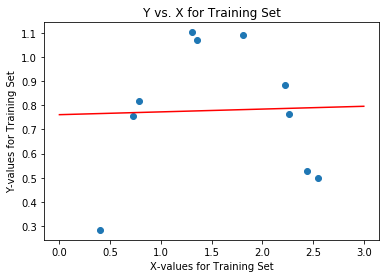

In [4]:
x_new = linspace(0,3)

#Plots the linear fit and the data
fit1 = polyfit(xtraining_array,ytraining_array,1)
y_new1 = polyval(fit1,x_new)

%matplotlib inline
#Plots the data points in the training set
plot(xtraining_array,ytraining_array,'o')
#Plots the line of best fit
plot(x_new,y_new1,'r-')

#Labels for the plot
xlabel('X-values for Training Set')
ylabel('Y-values for Training Set')
title('Y vs. X for Training Set')
show()

### 3.B. Degree 2 polynomial (a quadratic)

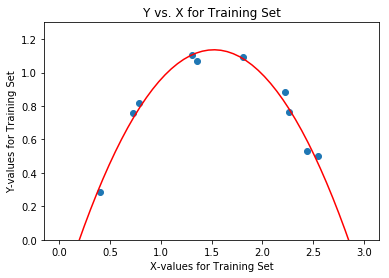

In [5]:
#Plots the linear fit and the data
fit2 = polyfit(xtraining_array,ytraining_array,2)
y_new2 = polyval(fit2,x_new)

%matplotlib inline
#Plots the data points in the training set
plot(xtraining_array,ytraining_array,'o')
#Plots the line of best fit
plot(x_new,y_new2,'r-')

#Labels for the plot
ylim(0,1.3)
xlabel('X-values for Training Set')
ylabel('Y-values for Training Set')
title('Y vs. X for Training Set')
show()

### 3.C. Degree 9 polynomial

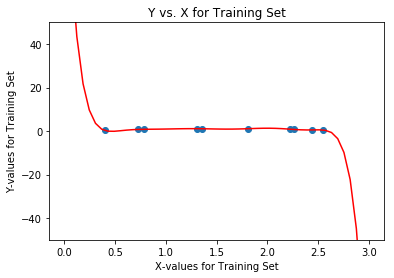

In [6]:
#Plots the linear fit and the data
fit9 = polyfit(xtraining_array,ytraining_array,9)
y_new9 = polyval(fit9,x_new)

%matplotlib inline
#Plots the data points in the training set
plot(xtraining_array,ytraining_array,'o')
#Plots the line of best fit
plot(x_new,y_new9,'r-')

#Labels for the plot
ylim(-50,50)
xlabel('X-values for Training Set')
ylabel('Y-values for Training Set')
title('Y vs. X for Training Set')
show()
#Notice the Y-axis values. This is to see the regression function.

## 4. Create a plot showing the original data as a scatter plot and the three polynomial fits with a legend indicating the degree of the polynomial. Also overlay the sin(x) function with a dotted line.

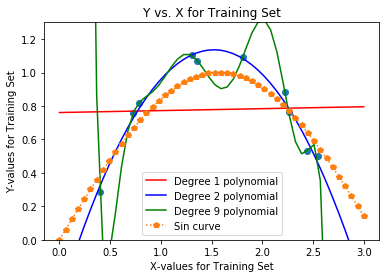

In [7]:
#Creating sin function
sin_func = sin(x_new)

%matplotlib inline
#Plots the data points in the training set
plot(xtraining_array,ytraining_array,'o')
#Plots the line of best fit and gives label for legend
plot(x_new,y_new1,'r-',label='Degree 1 polynomial')
#Plots a 2nd degree polynomial and gives label for legend
plot(x_new,y_new2,'b-',label='Degree 2 polynomial')
#Plots a 9th degree polynomial and gives label for legend
plot(x_new,y_new9,'g-',label='Degree 9 polynomial')
#plot sin function and gives label for legend
plot(x_new,sin_func,'p:',label='Sin curve')

#Labels for the plot
ylim(0,1.3)
xlabel('X-values for Training Set')
ylabel('Y-values for Training Set')
title('Y vs. X for Training Set')
legend(loc='best')
show()

## 5. Apply each of the 3 models to predict the y value from the x value in the test set. Find the root mean square error between the predictions and the true values. (The expectation is that the degree 2 polynomial should give the best prediction with degree 9 a close second)
The following link explains how to create a function that will calculate the [root mean square error](https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python) between the predicated values and the true valuee. We use this function in the following example. 

Root mean square error for Degree 1
0.3223452785956101
Root mean square error for Degree 2
0.17992217985349082
Root mean square error for Degree 9
31.024373602338688


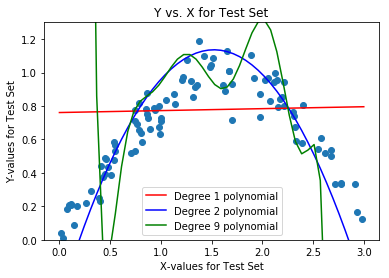

In [8]:
#Function for calculating the root mean square error
#The flatten() method is used to put the data types for the predictions
#and the targets in the same dimension so their values can be properly subtracted
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions.flatten()-targets.flatten())**2))

%matplotlib inline
#Plots the data points in the training set
plot(xtest_array,ytest_array,'o')
#Plots the line of best fit and gives label for legend
plot(x_new,y_new1,'r-',label='Degree 1 polynomial')
#Plots a 2nd degree polynomial and gives label for legend
plot(x_new,y_new2,'b-',label='Degree 2 polynomial')
#Plots a 9th degree polynomial and gives label for legend
plot(x_new,y_new9,'g-',label='Degree 9 polynomial')

ytest_predicted = polyval(fit1, xtest_array)
print('Root mean square error for Degree 1')
rms1 = rmse(ytest_predicted,ytest_array)
print(rms1)

ytest_predicted = polyval(fit2, xtest_array)
print('Root mean square error for Degree 2')
rms2 = rmse(ytest_predicted,ytest_array)
print(rms2)

ytest_predicted = polyval(fit9, xtest_array)
print('Root mean square error for Degree 9')
rms9 = rmse(ytest_predicted,ytest_array)
print(rms9)

#Labels for the plot
ylim(0,1.3)
xlabel('X-values for Test Set')
ylabel('Y-values for Test Set')
title('Y vs. X for Test Set')
legend(loc='best')
show()